In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [6]:
# Specify url: url
url = 'https://mieszkajwmiescie.pl/mieszkania-wyszukiwarka-kroki.html'

# Import packages
import requests
from bs4 import BeautifulSoup

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
table = soup.find('table')
table_rows = table.find_all('tr')

l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
    print(row)
    
df = pd.DataFrame(l, columns=["nazwa", "etap", "metraz", "pietro", "pokoje", 
                              "cena_za_metr", "cena"])

# seleckja tylko wolnych
#df_wolne = df.loc[df['status'] == 'Wolne']
#tableka_zbiorcza= df_wolne.groupby('etap').count()
#print(tableka_zbiorcza)

[]
['\n ', 'D1.103.M03', 'D', '64.00', '3', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'H1.105.M09', 'H', '54.90', '5', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'F2.105.M09', 'F', '69.87', '5', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'E7.103.M03', 'E', '65.83', '3', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'D1.104.M02', 'D', '64.00', '4', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'H1.106.M07', 'H', '56.91', '6', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'F2.106.M02', 'F', '61.76', '6', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'E8.103.M03', 'E', '60.73', '3', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'D3.100.M03', 'D', '66.22', '0', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'H1.106.M08', 'H', '54.91', '6', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'F2.106.M07', 'F', '68.63', '6', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'G1.101.M01', 'G', '67.95', '1', '3', '\nZapytajo cenę\n', '\n ', '']
['\n ', 'D6.100.M01', 'D', '71.90', '0', '3', '\nZapytajo cen

ValueError: 7 columns passed, passed data had 9 columns

In [ ]:
lista_numeric = ["metraz", "pietro", "pokoje",  "cena_za_metr", "cena"]
df_wolne[lista_numeric]= df_wolne[lista_numeric].replace([' ', '\n'],'', regex=True)
df_wolne[lista_numeric]= df_wolne[lista_numeric].replace('Zapytajocenę', np.nan, regex=True)
df_wolne = df_wolne.dropna()
df_wolne[lista_numeric]= df_wolne[lista_numeric].astype(float)

In [ ]:
srednia_cena = df_wolne.cena.mean()
srednia_metr = df_wolne.cena_za_metr.mean()
srednia_pow = df_wolne.metraz.mean()
now = datetime.datetime.now()
czas_scrapu = now.strftime("%Y-%m-%d")
liczba_mieszkan = df_wolne.shape[0]
print(czas_scrapu, srednia_cena, srednia_metr, srednia_pow, liczba_mieszkan)

#LM PLOT
sns.lmplot(x = "cena_za_metr", y ="pietro", data = df_wolne, hue = "etap")
tabelka = df_wolne.groupby('etap')['cena_za_metr'].mean()
print(tabelka)

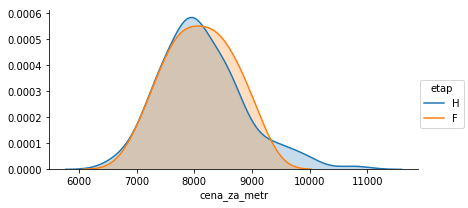

In [38]:
#KDE
fig = sns.FacetGrid(df_wolne, hue='etap', aspect = 2)
fig.map(sns.kdeplot, 'cena_za_metr', shade = True)
fig.add_legend()

In [ ]:
#multiplot - wiele zmiennych 

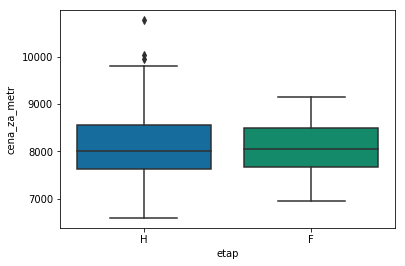

In [47]:
#boxplot
ax = sns.boxplot(y='cena_za_metr', x='etap', 
                 data=df_wolne, 
                 palette="colorblind")